In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sqlite3
import os
from pprint import pprint

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
tdf=pd.read_csv('/content/evtweetdataaggr.csv',delimiter='\t',index_col=0)
tdf["date"] = tdf["date"].astype("datetime64")
tdf.head()

,category,date,neg_count,neu_count,pos_count,neg_score,neu_score,pos_score,wt_neg,wt_neu,wt_pos,count
0,EVs,2022-08-01,22,46,13,25.289993,38.833596,16.876412,26.904634,41.171774,17.923593,81
1,EVs,2022-08-02,24,39,20,24.696431,35.620576,22.682993,25.073643,37.357318,27.569040,83
2,EVs,2022-08-03,3,12,1,4.463760,9.204348,2.331892,6.009396,13.196395,2.794208,16
3,EVs,2022-08-04,2,5,0,2.196746,3.635691,1.167563,2.196746,3.635691,1.167563,7
4,EVs,2022-08-05,8,20,14,7.420146,18.362986,16.216868,16.855830,160.879937,2816.264291,42


In [ ]:
sdf=pd.read_csv('/content/aggregatedStockV1.csv',delimiter='\t')
sdf["discreteAggr"] = (sdf['AGGRPERCENT'] > 0)
sdf["discreteAggr"] = sdf["discreteAggr"].astype("int32")
sdf.columns=['category','ticker','date','open','close','high','low','aggrpercent','discreteaggr']
sdf["date"] = sdf["date"].astype("datetime64")
sdf=sdf.drop(columns=['ticker','open','high','low'])
sdf = sdf[sdf['category'] == 'EVs']
sdf

,category,date,close,aggrpercent,discreteaggr
368,EVs,2022-08-01,297.2767,-1.3271,0
369,EVs,2022-08-02,300.5867,2.2392,1
370,EVs,2022-08-03,307.3967,0.7858,1
371,EVs,2022-08-04,308.6333,-0.7610,0
372,EVs,2022-08-05,288.1700,-4.7907,0
...,...,...,...,...,...
547,EVs,2023-01-27,177.9000,9.5241,1
548,EVs,2023-01-28,172.2800,1.1983,1
549,EVs,2023-01-29,169.4700,-2.6873,0
550,EVs,2023-01-30,166.6600,-6.3971,0


In [ ]:
merged_df = pd.merge(tdf, sdf,on=["category", "date"]) 
merged_df = merged_df.sort_values(by=["category", "date"]).reset_index(drop=True)
df=merged_df.drop(columns = ['category'])
df

,date,neg_count,neu_count,pos_count,neg_score,neu_score,pos_score,wt_neg,wt_neu,wt_pos,count,close,aggrpercent,discreteaggr
0,2022-08-01,22,46,13,25.289993,38.833596,16.876412,26.904634,41.171774,17.923593,81,297.2767,-1.3271,0
1,2022-08-02,24,39,20,24.696431,35.620576,22.682993,25.073643,37.357318,27.569040,83,300.5867,2.2392,1
2,2022-08-03,3,12,1,4.463760,9.204348,2.331892,6.009396,13.196395,2.794208,16,307.3967,0.7858,1
3,2022-08-04,2,5,0,2.196746,3.635691,1.167563,2.196746,3.635691,1.167563,7,308.6333,-0.7610,0
4,2022-08-05,8,20,14,7.420146,18.362986,16.216868,16.855830,160.879937,2816.264291,42,288.1700,-4.7907,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2023-01-27,53,132,88,54.571610,123.878640,94.549750,54.706017,124.625530,96.668453,273,177.9000,9.5241,1
180,2023-01-28,12,38,13,11.971517,36.858118,14.170364,11.971517,36.858118,14.170364,63,172.2800,1.1983,1
181,2023-01-29,55,99,43,52.376819,91.720372,52.902809,53.603129,94.236598,56.160273,197,169.4700,-2.6873,0
182,2023-01-30,74,124,65,70.690331,118.406001,73.903666,76.519447,123.761713,81.718839,263,166.6600,-6.3971,0


In [ ]:
import datetime

t_df = df.copy(deep = True)

t_df = t_df.drop(columns = ['neg_score', 'neu_score', 'pos_score', 'wt_neg', 'wt_neu', 'wt_pos', 'aggrpercent', 'count'])

t_minus_1_df = t_df.copy(deep = True).drop(columns = ['discreteaggr'])
t_minus_2_df = t_df.copy(deep = True).drop(columns = ['discreteaggr'])

t_minus_1_df['date'] = t_minus_1_df['date'] + datetime.timedelta(1)

t_minus_2_df['date'] = t_minus_2_df['date'] + datetime.timedelta(2)

t_df.rename(columns = {'neg_count': 't_neg_count', 'neu_count': 't_neu_count', \
            'pos_count': 't_pos_count'}, inplace = True)

t_df['t_pos_neg_ratio'] = t_df['t_pos_count'] / (t_df['t_neg_count'] + 0.01)

t_minus_1_df.rename(columns = {'neg_count': 't-1_neg_count', 'neu_count': 't-1_neu_count', \
                     'pos_count': 't-1_pos_count'}, inplace = True)

t_minus_1_df['t-1_pos_neg_ratio'] = t_minus_1_df['t-1_pos_count'] / (t_minus_1_df['t-1_neg_count'] + 0.01)

t_minus_2_df.rename(columns = {'neg_count': 't-2_neg_count', 'neu_count': 't-2_neu_count', \
                     'pos_count': 't-2_pos_count'}, inplace = True)

time_df = pd.merge(t_df, t_minus_1_df, on=["date"]) 
#time_df = pd.merge(time_df, t_minus_2_df, on=["date"])

aggs_column = time_df.pop("discreteaggr")
time_df.insert(9, "discreteaggr", aggs_column)

time_df

,date,t_neg_count,t_neu_count,t_pos_count,close_x,t_pos_neg_ratio,t-1_neg_count,t-1_neu_count,t-1_pos_count,discreteaggr,close_y,t-1_pos_neg_ratio
0,2022-08-02,24,39,20,300.5867,0.832986,22,46,13,1,297.2767,0.590641
1,2022-08-03,3,12,1,307.3967,0.332226,24,39,20,1,300.5867,0.832986
2,2022-08-04,2,5,0,308.6333,0.000000,3,12,1,0,307.3967,0.332226
3,2022-08-05,8,20,14,288.1700,1.747815,2,5,0,0,308.6333,0.000000
4,2022-08-06,7,12,4,289.3000,0.570613,8,20,14,0,288.1700,1.747815
...,...,...,...,...,...,...,...,...,...,...,...,...
178,2023-01-27,53,132,88,177.9000,1.660064,146,285,172,1,160.2700,1.178002
179,2023-01-28,12,38,13,172.2800,1.082431,53,132,88,1,177.9000,1.660064
180,2023-01-29,55,99,43,169.4700,0.781676,12,38,13,0,172.2800,1.082431
181,2023-01-30,74,124,65,166.6600,0.878260,55,99,43,0,169.4700,0.781676


In [ ]:
data_df = time_df.drop(columns = ['date'])
columns = data_df.columns[:-1]
output_labels = data_df.pop("discreteaggr")
data_df.head()

,t_neg_count,t_neu_count,t_pos_count,close_x,t_pos_neg_ratio,t-1_neg_count,t-1_neu_count,t-1_pos_count,close_y,t-1_pos_neg_ratio
0,24,39,20,300.5867,0.832986,22,46,13,297.2767,0.590641
1,3,12,1,307.3967,0.332226,24,39,20,300.5867,0.832986
2,2,5,0,308.6333,0.000000,3,12,1,307.3967,0.332226
3,8,20,14,288.1700,1.747815,2,5,0,308.6333,0.000000
4,7,12,4,289.3000,0.570613,8,20,14,288.1700,1.747815


In [ ]:
data_df[data_df['t_pos_neg_ratio'] >= 1000] = 10
data_df[data_df['t-1_pos_neg_ratio'] >= 1000] = 10
data_df

,t_neg_count,t_neu_count,t_pos_count,close_x,t_pos_neg_ratio,t-1_neg_count,t-1_neu_count,t-1_pos_count,close_y,t-1_pos_neg_ratio
0,24,39,20,300.5867,0.832986,22,46,13,297.2767,0.590641
1,3,12,1,307.3967,0.332226,24,39,20,300.5867,0.832986
2,2,5,0,308.6333,0.000000,3,12,1,307.3967,0.332226
3,8,20,14,288.1700,1.747815,2,5,0,308.6333,0.000000
4,7,12,4,289.3000,0.570613,8,20,14,288.1700,1.747815
...,...,...,...,...,...,...,...,...,...,...
178,53,132,88,177.9000,1.660064,146,285,172,160.2700,1.178002
179,12,38,13,172.2800,1.082431,53,132,88,177.9000,1.660064
180,55,99,43,169.4700,0.781676,12,38,13,172.2800,1.082431
181,74,124,65,166.6600,0.878260,55,99,43,169.4700,0.781676


In [ ]:
scaler = StandardScaler() 
data_df = scaler.fit_transform(data_df) 

data_df

array([[-0.55111071, -0.66197137, -0.54508877, ..., -0.68438291,
         1.29472333, -0.37373183],
       [-0.78796136, -0.94369407, -0.9322744 , ..., -0.54190046,
         1.34597155,  0.30127578],
       [-0.79923996, -1.01673328, -0.95265259, ..., -0.92863853,
         1.45140973, -1.09349676],
       ...,
       [-0.20147405, -0.03592093, -0.07639038, ..., -0.68438291,
        -0.64058132,  0.99605745],
       [ 0.01281939,  0.22493342,  0.37192983, ..., -0.07374384,
        -0.68408812,  0.158361  ],
       [ 0.0579338 ,  0.26667012, -0.21903772, ...,  0.37405814,
        -0.72759492,  0.42737632]])

In [ ]:
data_df = pd.DataFrame(data_df, columns=columns)

new_df = pd.concat([data_df, output_labels], axis = 1)

new_df.corr(method="spearman")
#new_df.head()

,t_neg_count,t_neu_count,t_pos_count,close_x,t_pos_neg_ratio,t-1_neg_count,t-1_neu_count,t-1_pos_count,discreteaggr,close_y,discreteaggr
t_neg_count,1.000000,0.942586,0.919252,-0.470049,-0.139342,0.331310,0.347078,0.269402,-0.469904,-0.131284,-0.074528
t_neu_count,0.942586,1.000000,0.915823,-0.579518,-0.015626,0.350634,0.398153,0.289131,-0.582841,-0.108275,-0.029686
t_pos_count,0.919252,0.915823,1.000000,-0.427598,0.184145,0.268706,0.288703,0.229738,-0.430997,-0.075167,-0.030415
close_x,-0.470049,-0.579518,-0.427598,1.000000,0.029702,-0.469318,-0.576893,-0.427339,0.990223,0.028514,0.035704
t_pos_neg_ratio,-0.139342,-0.015626,0.184145,0.029702,1.000000,-0.120474,-0.096862,-0.056316,0.036072,0.141682,0.108255
t-1_neg_count,0.331310,0.350634,0.268706,-0.469318,-0.120474,1.000000,0.942017,0.920630,-0.470428,-0.132715,-0.016712
t-1_neu_count,0.347078,0.398153,0.288703,-0.576893,-0.096862,0.942017,1.000000,0.916778,-0.578828,-0.008771,0.013390
t-1_pos_count,0.269402,0.289131,0.229738,-0.427339,-0.056316,0.920630,0.916778,1.000000,-0.431917,0.188893,0.042872
discreteaggr,-0.469904,-0.582841,-0.430997,0.990223,0.036072,-0.470428,-0.578828,-0.431917,1.000000,0.022327,-0.042969
close_y,-0.131284,-0.108275,-0.075167,0.028514,0.141682,-0.132715,-0.008771,0.188893,0.022327,1.000000,0.115728


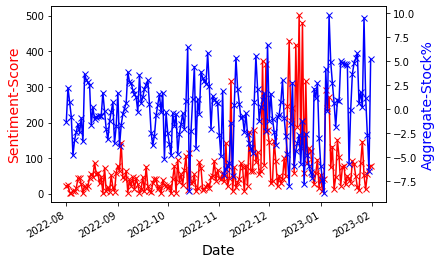

In [ ]:
fig,ax = plt.subplots()
fig.autofmt_xdate()
ax.plot(df['date'], df['neg_count'], color="red", marker="x")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Sentiment-Score",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(df['date'], df['aggrpercent'],color="blue",marker="x")
ax2.set_ylabel("Aggregate-Stock%",color="blue",fontsize=14)
#plt.rcParams['figure.figsize'] = [10, 5]
#plt.rcParams['figure.dpi'] = 50

plt.show()

In [ ]:
df.corr(method='pearson')

,neg_count,neu_count,pos_count,neg_score,neu_score,pos_score,wt_neg,wt_neu,wt_pos,count,close,aggrpercent,discreteaggr
neg_count,1.000000,0.944964,0.872075,0.998923,0.958886,0.902776,0.773651,0.765203,0.302807,0.974076,-0.401581,-0.090048,-0.114939
neu_count,0.944964,1.000000,0.940838,0.956231,0.998023,0.966884,0.738194,0.795335,0.334688,0.990619,-0.489748,-0.027200,-0.069389
pos_count,0.872075,0.940838,1.000000,0.883791,0.946161,0.995134,0.705865,0.800221,0.388777,0.950134,-0.398210,-0.007711,-0.065347
neg_score,0.998923,0.956231,0.883791,1.000000,0.967868,0.914021,0.775657,0.772270,0.308634,0.980918,-0.407551,-0.080848,-0.109282
neu_score,0.958886,0.998023,0.946161,0.967868,1.000000,0.969957,0.748366,0.799987,0.335806,0.996349,-0.482319,-0.037397,-0.078656
pos_score,0.902776,0.966884,0.995134,0.914021,0.969957,1.000000,0.723033,0.808851,0.381129,0.971979,-0.420714,-0.015296,-0.066958
wt_neg,0.773651,0.738194,0.705865,0.775657,0.748366,0.723033,1.000000,0.856437,0.281207,0.763305,-0.304410,-0.108402,-0.078020
wt_neu,0.765203,0.795335,0.800221,0.772270,0.799987,0.808851,0.856437,1.000000,0.416913,0.804365,-0.348048,-0.045289,-0.037514
wt_pos,0.302807,0.334688,0.388777,0.308634,0.335806,0.381129,0.281207,0.416913,1.000000,0.342225,-0.103902,-0.048280,-0.044607
count,0.974076,0.990619,0.950134,0.980918,0.996349,0.971979,0.763305,0.804365,0.342225,1.000000,-0.447871,-0.048122,-0.087954


In [ ]:
from scipy.stats import pearsonr,spearmanr

In [ ]:
from scipy.stats import pearsonr
list1 = df['wt_neu']
list2 = df['close']
corr, _ = pearsonr(list1, list2)
corr

-0.34804820637403855

In [ ]:
from scipy.stats import spearmanr
list1 = df['wt_neu']
list2 = df['close']
corr, _ = spearmanr(list1, list2)
corr

-0.5410948942374013

In [ ]:
from scipy.stats import pearsonr
list1 = df['neu_score']
list2 = df['close']
corr, _ = pearsonr(list1, list2)
corr

-0.48231943798270877

In [ ]:
from scipy.stats import spearmanr
list1 = df['neu_score']
list2 = df['close']
corr, _ = spearmanr(list1, list2)
corr

-0.5753015500585879

In [ ]:
from scipy.stats import pearsonr
list1 = df['wt_neu']
list2 = df['aggrpercent']
corr, _ = pearsonr(list1, list2)
corr

-0.04528892143911279

In [ ]:
from scipy.stats import spearmanr
list1 = df['wt_neu']
list2 = df['aggrpercent']
corr, _ = spearmanr(list1, list2)
corr

-0.05707268209050105

In [ ]:
from scipy.stats import pearsonr
list1 = df['neu_score']
list2 = df['aggrpercent']
corr, _ = pearsonr(list1, list2)
corr

-0.03739669062022356

In [ ]:
from scipy.stats import spearmanr
list1 = df['neu_score']
list2 = df['aggrpercent']
corr, _ = spearmanr(list1, list2)
corr

-0.024493845235113942

In [ ]:
time_df.corr(method='pearson')

,t_neg_count,t_neu_count,t_pos_count,close_x,t_pos_neg_ratio,t-1_neg_count,t-1_neu_count,t-1_pos_count,discreteaggr,close_y,t-1_pos_neg_ratio
t_neg_count,1.000000,0.944863,0.871831,-0.399726,-0.188911,0.321428,0.311715,0.253883,-0.118179,-0.397516,-0.157818
t_neu_count,0.944863,1.000000,0.940733,-0.488297,-0.063566,0.324056,0.354800,0.286248,-0.072563,-0.490942,-0.124266
t_pos_count,0.871831,0.940733,1.000000,-0.395680,0.093930,0.288862,0.324713,0.289158,-0.069025,-0.399391,-0.093162
close_x,-0.399726,-0.488297,-0.395680,1.000000,-0.003107,-0.409684,-0.489108,-0.395387,0.007802,0.995530,-0.001371
t_pos_neg_ratio,-0.188911,-0.063566,0.093930,-0.003107,1.000000,-0.098898,-0.047954,-0.014768,0.113762,-0.002666,0.088911
t-1_neg_count,0.321428,0.324056,0.288862,-0.409684,-0.098898,1.000000,0.945072,0.872266,-0.087960,-0.401804,-0.187546
t-1_neu_count,0.311715,0.354800,0.324713,-0.489108,-0.047954,0.945072,1.000000,0.941464,-0.026931,-0.489445,-0.061318
t-1_pos_count,0.253883,0.286248,0.289158,-0.395387,-0.014768,0.872266,0.941464,1.000000,0.003052,-0.399420,0.094449
discreteaggr,-0.118179,-0.072563,-0.069025,0.007802,0.113762,-0.087960,-0.026931,0.003052,1.000000,-0.047374,0.069630
close_y,-0.397516,-0.490942,-0.399391,0.995530,-0.002666,-0.401804,-0.489445,-0.399420,-0.047374,1.000000,-0.008232


In [ ]:
time_df.corr(method='spearman')

,t_neg_count,t_neu_count,t_pos_count,close_x,t_pos_neg_ratio,t-1_neg_count,t-1_neu_count,t-1_pos_count,discreteaggr,close_y,t-1_pos_neg_ratio
t_neg_count,1.000000,0.942586,0.919252,-0.470049,-0.139342,0.331310,0.347078,0.269402,-0.074528,-0.469904,-0.131284
t_neu_count,0.942586,1.000000,0.915823,-0.579518,-0.015626,0.350634,0.398153,0.289131,-0.029686,-0.582841,-0.108275
t_pos_count,0.919252,0.915823,1.000000,-0.427598,0.184145,0.268706,0.288703,0.229738,-0.030415,-0.430997,-0.075167
close_x,-0.470049,-0.579518,-0.427598,1.000000,0.029702,-0.469318,-0.576893,-0.427339,0.035704,0.990223,0.028514
t_pos_neg_ratio,-0.139342,-0.015626,0.184145,0.029702,1.000000,-0.120474,-0.096862,-0.056316,0.108255,0.036072,0.141682
t-1_neg_count,0.331310,0.350634,0.268706,-0.469318,-0.120474,1.000000,0.942017,0.920630,-0.016712,-0.470428,-0.132715
t-1_neu_count,0.347078,0.398153,0.288703,-0.576893,-0.096862,0.942017,1.000000,0.916778,0.013390,-0.578828,-0.008771
t-1_pos_count,0.269402,0.289131,0.229738,-0.427339,-0.056316,0.920630,0.916778,1.000000,0.042872,-0.431917,0.188893
discreteaggr,-0.074528,-0.029686,-0.030415,0.035704,0.108255,-0.016712,0.013390,0.042872,1.000000,-0.042969,0.115728
close_y,-0.469904,-0.582841,-0.430997,0.990223,0.036072,-0.470428,-0.578828,-0.431917,-0.042969,1.000000,0.022327


In [ ]:
from scipy.stats import pearsonr
list1 = time_df['t-1_neu_count']
list2 = time_df['close_y']
corr, _ = pearsonr(list1, list2)
corr

-0.48944478801360364

In [ ]:
from scipy.stats import spearmanr
list1 = time_df['t-1_neu_count']
list2 = time_df['close_y']
corr, _ = spearmanr(list1, list2)
corr

-0.5788278395236742

In [ ]:
from scipy.stats import pearsonr
list1 = df['neg_score']
list2 = df['close']
corr, _ = pearsonr(list1, list2)
corr

-0.4075510064399827

In [ ]:
from scipy.stats import spearmanr
list1 = df['neg_score']
list2 = df['close']
corr, _ = spearmanr(list1, list2)
corr

-0.4835357472751249

In [ ]:
from scipy.stats import pearsonr
list1 = time_df['t-1_neg_count']
list2 = time_df['close_y']
corr, _ = pearsonr(list1, list2)
corr

-0.40180430845086584

In [ ]:
from scipy.stats import spearmanr
list1 = time_df['t-1_neg_count']
list2 = time_df['close_y']
corr, _ = spearmanr(list1, list2)
corr

-0.470427713058414